# Importing Needed Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

import keras
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from preprocessing_data.utils import format_Dataframes, preprocessing_dataframe

In [2]:
data_raw = format_Dataframes("D:\-DSP391m-Forecasting-Financial-Time-Series-With-Transformer\craw_data\FPT_stock.xlsx",'xlsx')
data_raw.head(10)

,Tên,Ngày,Đóng cửa,Điều chỉnh,Thay đổi,Thay đổi 1,%,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
0,FPT,2024-05-21,136.0,--,3(2.26,3(2.26%),%),NaN,467.06,734.400,99.45,134.0,136.0,133.5
1,FPT,2024-05-20,133.0,--,-1.5(-1.12,-1.5(-1.12%),%),NaN,270.50,NaN,152.86,135.2,136.1,133.0
2,FPT,2024-05-17,134.5,--,-0.9(-0.66,-0.9(-0.66%),%),NaN,310.27,642.601,86.43,135.4,136.0,133.7
3,FPT,2024-05-16,135.4,--,1.3(0.97,1.3(0.97%),%),NaN,423.78,924.900,119.98,135.6,137.3,134.2
4,FPT,2024-05-15,134.1,--,3.6(2.76,3.6(2.76%),%),NaN,485.07,NaN,139.80,131.5,134.5,131.3
5,FPT,2024-05-14,130.5,--,0.8(0.62,0.8(0.62%),%),NaN,300.96,847.300,113.19,130.0,131.7,129.6
6,FPT,2024-05-13,129.7,--,-1.3(-0.99,-1.3(-0.99%),%),NaN,240.66,NaN,336.62,131.3,131.5,128.8
7,FPT,2024-05-10,131.0,--,0.7(0.54,0.7(0.54%),%),NaN,494.17,0.000,0.00,131.3,132.2,129.2
8,FPT,2024-05-09,130.3,--,-0.7(-0.53,-0.7(-0.53%),%),NaN,288.30,838.300,111.35,130.6,132.8,130.0
9,FPT,2024-05-08,131.0,--,-0.3(-0.23,-0.3(-0.23%),%),NaN,392.62,759.700,104.94,130.1,131.0,129.3


In [3]:
data_FPT = preprocessing_dataframe(data_raw)
data_FPT.head(10)

,Đóng cửa,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
Ngày,,,,,,,,
2006-12-13,0.581160,0.083545,0.000035,0.000000,0.000000,0.581226,0.574601,0.581292
2006-12-14,0.612771,0.280761,0.000142,0.096823,0.000049,0.612832,0.605881,0.612893
2006-12-15,0.645962,0.265348,0.000142,0.030257,0.000012,0.646018,0.638724,0.646074
2006-12-18,0.680733,0.215829,0.000118,0.010086,0.000000,0.680784,0.673131,0.680834
2006-12-19,0.717086,0.137545,0.000083,0.000000,0.000000,0.717130,0.709102,0.717175
2006-12-20,0.755018,0.220160,0.000130,0.000000,0.000000,0.755057,0.746637,0.755096
2006-12-21,0.715505,0.156428,0.000094,0.000000,0.000000,0.740834,0.732562,0.715595
2006-12-22,0.677572,0.143526,0.000083,0.010086,0.000000,0.677623,0.670003,0.677674
2006-12-25,0.641220,0.022144,0.000012,0.030257,0.000012,0.641277,0.634032,0.641334


In [4]:
data_FPT.isnull().sum()

Đóng cửa                   0
Khối lượng (Khớp lệnh)     0
Giá trị (Khớp lệnh)        0
Khối lượng (Thỏa thuận)    0
Giá trị (Thỏa thuận)       0
Mở cửa                     0
Cao nhất                   0
Thấp nhất                  0
dtype: int64

## Reading The Data

# Data Exploration

In [5]:
data_FPT.head(10)

,Đóng cửa,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
Ngày,,,,,,,,
2006-12-13,0.581160,0.083545,0.000035,0.000000,0.000000,0.581226,0.574601,0.581292
2006-12-14,0.612771,0.280761,0.000142,0.096823,0.000049,0.612832,0.605881,0.612893
2006-12-15,0.645962,0.265348,0.000142,0.030257,0.000012,0.646018,0.638724,0.646074
2006-12-18,0.680733,0.215829,0.000118,0.010086,0.000000,0.680784,0.673131,0.680834
2006-12-19,0.717086,0.137545,0.000083,0.000000,0.000000,0.717130,0.709102,0.717175


In [6]:
data_FPT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4343 entries, 2006-12-13 to 2024-05-21
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Đóng cửa                 4343 non-null   float64
 1   Khối lượng (Khớp lệnh)   4343 non-null   float64
 2   Giá trị (Khớp lệnh)      4343 non-null   float64
 3   Khối lượng (Thỏa thuận)  4343 non-null   float64
 4   Giá trị (Thỏa thuận)     4343 non-null   float64
 5   Mở cửa                   4343 non-null   float64
 6   Cao nhất                 4343 non-null   float64
 7   Thấp nhất                4343 non-null   float64
dtypes: float64(8)
memory usage: 305.4 KB


In [7]:
data_FPT.describe()

,Đóng cửa,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
count,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000
mean,0.077245,0.386191,0.087992,0.099514,0.022386,0.077426,0.077282,0.076303
std,0.133764,0.214971,0.101205,0.188193,0.064048,0.133862,0.133581,0.132555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.023392,0.239403,0.022747,0.000000,0.000000,0.023388,0.023303,0.023187
50%,0.035088,0.386191,0.060407,0.000000,0.000000,0.035240,0.035815,0.034603
75%,0.078552,0.421741,0.104396,0.099514,0.022386,0.078382,0.078433,0.077263
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

### Choosing Prediction Column

In [8]:
dataset = data_FPT["Đóng cửa"]
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(4343, 1)

In [9]:
data

array([[0.58116011],
       [0.61277067],
       [0.64596175],
       ...,
       [0.16152995],
       [0.15915916],
       [0.16390074]])

### Normalizing Data

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [11]:
scaled_data

array([[0.58116011],
       [0.61277067],
       [0.64596175],
       ...,
       [0.16152995],
       [0.15915916],
       [0.16390074]])

### Splitting the Data

In [12]:
# 75% to Train , 25% to Test
train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 3257 Test Size : 1086


In [13]:
train_data

array([[0.58116011],
       [0.61277067],
       [0.64596175],
       ...,
       [0.03903904],
       [0.04077762],
       [0.03872293]])

In [14]:
train_data.shape, test_data.shape

((3257, 1), (1146, 1))

### Creating training set

In [15]:
# Creating a Training set with 60 time-steps and 1 output
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [16]:
train_data

array([[0.58116011],
       [0.61277067],
       [0.64596175],
       ...,
       [0.03903904],
       [0.04077762],
       [0.03872293]])

In [17]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [19]:
x_train.shape , y_train.shape

((3197, 60, 1), (3197,))

# GRU Model

### Model Dtructure

In [20]:
# # Gated Recurrent Unit 
# Ưu điểm: Đơn giản hơn LSTM (ít tham số hơn), thường huấn luyện nhanh hơn và đôi khi cho hiệu suất tương đương hoặc tốt hơn.
# Nhược điểm: Có thể không hiệu quả bằng LSTM trong việc nắm bắt các phụ thuộc dài hạn trong một số trường hợp.

In [22]:


model = Sequential([
    GRU(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    GRU(64, return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error', 'mean_squared_error'])



In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        22,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,847 (128.31 KB)

 Trainable params: 32,847 (128.31 KB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [24]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0016 - mean_absolute_error: 0.0192 - mean_squared_error: 0.0016
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.4656e-04 - mean_absolute_error: 0.0083 - mean_squared_error: 2.4656e-04
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.3921e-04 - mean_absolute_error: 0.0071 - mean_squared_error: 2.3921e-04
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 9.7745e-05 - mean_absolute_error: 0.0048 - mean_squared_error: 9.7745e-05
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.0822e-04 - mean_absolute_error: 0.0056 - mean_squared_error: 1.0822e-04
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 8.6521e-05 - mean_absolute_error: 0.0047 - mean_squared_error: 8.6521e-05
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 5.5084e-05 - mean_absolute_error: 0.0042 - mean_squared_error: 5.5084e-05
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - 

### Model Evaluation

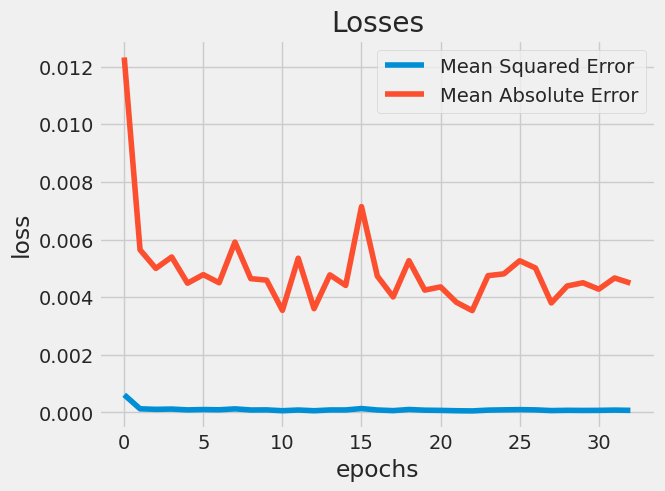

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Predection

### Creating testing set

In [ ]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape , y_test.shape

((1086, 60, 1), (1086,))

In [ ]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

34/34 [==============================] - 1s 16ms/step


(1086, 1)

# MSE,MAE,HUBER

In [ ]:
# Tính toán MSE
mse =  tf.keras.losses.MeanSquaredError()
mse = mse(y_test, predictions).numpy()
print(f'MSE: {np.mean(mse)}')

# Tính toán MAE
mae = tf.keras.losses.MeanAbsoluteError()
mae = mae(y_test, predictions).numpy()
print(f'MAE: {np.mean(mae)}')

# Tính toán Huber loss
huber_loss = tf.keras.losses.Huber()
huber_loss_value = huber_loss(y_test, predictions).numpy()
print(f'Huber Loss: {np.mean(huber_loss_value)}')

MSE: 0.0018370471661910415
MAE: 0.03379825875163078
Huber Loss: 0.0009185235248878598


Text(0.5, 1.0, 'Evaluation Metrics on Test Data')

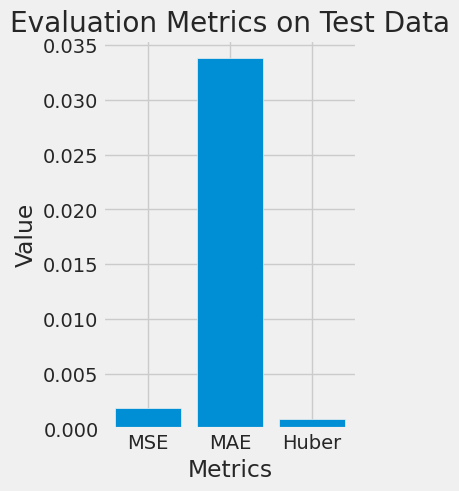

In [ ]:
plt.subplot(1, 2, 2)
plt.bar(['MSE', 'MAE', 'Huber'], [np.mean(mse), np.mean(mae), np.mean(huber_loss_value)])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics on Test Data')
